<a href="https://colab.research.google.com/github/anamunoz01/AA_PRACTICA1_GRUPO_10/blob/main/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA 1**

GRUPO 10
 
Elena Gómez

Ana Muñoz

### **OBJETIVO**

Crear un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones. 

En primer lugar tenemos que crear un modelo en Keras aplicando el conjunto de datos Fashion-MNIST.

Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando, una tienda de moda online alemana especializada en ventas de ropa y zapatos. 

El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución (28 x 28 píxeles). Se usan 60K imágenes para entrenar la red y 10K imágenes para evaluar la precisión con la que la red aprende a clasificar las imágenes

- Importamos tensorflow y comprobamos que la versión es 2.0.0 o superior 

In [59]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

2.6.0
GPU Available: []
2.6.0


- A continuación, cargamos las imágenes y creamos un vector de 10 elementos en el que a cada posición se le asigna el nombre de cada prenda. ('class_names')

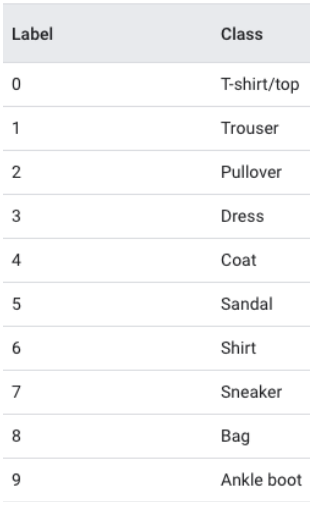

In [60]:
# Importamos las imágenes
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Creamos vector con las prendas
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']




- Estudiamos los **datos de entrenamiento**


In [61]:
print(train_images.shape)

(60000, 28, 28)


In [62]:
# Vemos la matriz de la imagen 50000 de las imágenes de entrenamiento
train_images[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  44, 127,
        182, 185, 161, 120,  55,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 198, 251, 255,
        251, 249, 247, 255, 252, 214, 100,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0, 233, 252, 237, 239,
        234, 237, 235, 237, 237, 254, 227,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  16, 210, 225, 215, 175,
        217, 216, 193, 196, 226, 221, 209,  50,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 199, 229, 232, 230, 245, 204,
        219, 253, 245, 207, 194, 223, 231, 236, 235,   0,   0,   3,   0,
          0,   0],
       [  

In [63]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [64]:
#Sacamos la etiqueta de la imagen 50000
train_labels[5000]

4

Imprimimos la imagen 5000 por pantalla utilizando matplotlib, y nos damos cuenta que corresponde con el elemento 4 de nuestro vector, es decir, un abrigo.

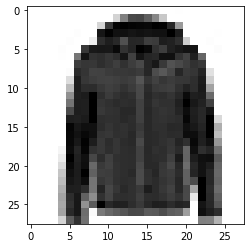

In [65]:
import matplotlib.pyplot as plt
digit = train_images[5000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

- Estudiamos los **datos de prueba**

In [66]:
print(test_images.shape)

(10000, 28, 28)


In [67]:
# Vemos la matriz de la imagen 8000 de las imágenes de prueba
test_images[8000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [68]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [69]:
#Sacamos la etiqueta de la imagen 8000
test_labels[8000]

7

Imprimimos la imagen 8000 por pantalla utilizando matplotlib, y vemos que corresponde con el elemento 7 de nuestro vector, una zapatilla.

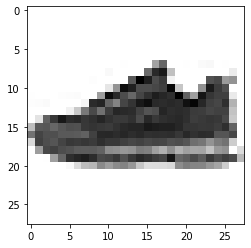

In [70]:
digit = test_images[8000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### **CREAMOS LAS RNA**

Una vez estudiado los datos vamos a crear 8 modelos diferentes de RNA,  los cuales van a ser definidos, configurados, entrenados, evaluados y mejorados para posteriormente usarlos para hacer predicciones.

Para todos los modelos la red sera secuencial y tendrá dos capas tipo Dense (densamente conectadas). Cambiaremos el optimizador, la función de activación y el número de neuronas de la primera capa.

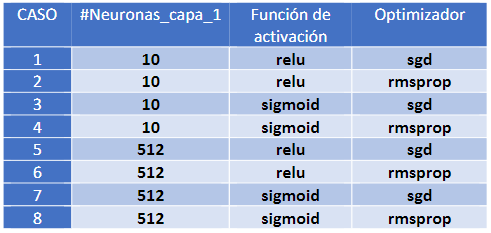

Cada una de las neuronas de la capa de entrada están conectadas con los 784 píxeles de cada imagen (28*28). Solo lo 
definimos para la primera capa, para la segunda capa y posteriores, Keras lo 
deduce.

Para todos los modelos, la segunda capa tendrá la función de activación "softmax" de 10 vías (o neuronas), en la que la salida de cada neurona corresponde a la probabilidad estimada de la clase correspondiente. Dada una imagen de entrada, obtendremos las probabilidades de que sea cada uno de las 10 posibles prendas. 

Obtendremos como vector de salida de la red neuronal una distribución de probabilidad sobre un conjunto de etiquetas, es decir, un vector de 10 probabilidades cada una correspondiente a una prenda y que todas estas 10 probabilidades sumen 1 (las probabilidades se expresarán entre 0 y 1).

- Para los cuatro primeros modelos, la primera capa tendrá 10 neuronas.

In [71]:
from keras import models
from keras import layers

**MODELO 1**

In [72]:
#función de activación: relu
#optimizador: sgd
network1 = models.Sequential()
network1.add(layers.Dense(10, activation='relu', input_shape=(28*28,), name = 'capa1'))
network1.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network1.summary()
# 7850 = 784 x 10 + 10 Sesgo
# 110 = 10 x 10 + 10 Sesgo
# 7960 = 7850 + 110


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


**MODELO 2**

In [73]:
#función de activación: relu
#optimizador: rmsprop
network2 = models.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(28*28,), name = 'capa1'))
network2.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


**MODELO 3**

In [74]:
##función de activación: sigmoid
#optimizador: sgd
network3 = models.Sequential()
network3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,), name = 'capa1'))
network3.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network3.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


**MODELO 4**

In [75]:
#función de activación: sigmoid
#optimizador: rmsprop
network4 = models.Sequential()
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,), name = 'capa1'))
network4.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network4.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


- Para los cuatro últimos modelos, la primera capa tendrá 512 neuronas.

**MODELO 5**

In [76]:
#función de activación: relu
#optimizador: sgd
network5 = models.Sequential()
network5.add(layers.Dense(512, activation='relu', input_shape=(28*28,), name = 'capa1'))
network5.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network5.summary()
# 7850 = 784 x 10 + 10 Sesgo
# 110 = 10 x 10 + 10 Sesgo
# 7960 = 7850 + 110

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 512)               401920    
_________________________________________________________________
capa2 (Dense)                (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**MODELO 6**

In [77]:
#función de activación: relu
#optimizador: sgd
network6 = models.Sequential()
network6.add(layers.Dense(512, activation='relu', input_shape=(28*28,), name = 'capa1'))
network6.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network6.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 512)               401920    
_________________________________________________________________
capa2 (Dense)                (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**MODELO 7**

In [78]:
#función de activación: relu
#optimizador: sgd
network7 = models.Sequential()
network7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,), name = 'capa1'))
network7.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network7.summary()
# 7850 = 784 x 10 + 10 Sesgo
# 110 = 10 x 10 + 10 Sesgo
# 7960 = 7850 + 110

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 512)               401920    
_________________________________________________________________
capa2 (Dense)                (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**MODELO 8**

In [79]:
#función de activación: relu
#optimizador: sgd
network8 = models.Sequential()
network8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,), name = 'capa1'))
network8.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network8.summary()
# 7850 = 784 x 10 + 10 Sesgo
# 110 = 10 x 10 + 10 Sesgo
# 7960 = 7850 + 110

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 512)               401920    
_________________________________________________________________
capa2 (Dense)                (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**COMPILACIÓN**

* Para el algoritmo optimizador utilizamos '**rmsprop**' (Root Mean Square 
Propagation), o '**sgd**' (Stocastic Gradient Descendent), dependiendo del modelo.

* Para la función de perdida elegimos **spars_categorical_crossentropy** que se utiliza como señal de retroalimentación para aprender los tensores de peso y que la fase de entrenamiento intentará minimizar.

* Para la precisión utilizaremos **accuracy**: Solo tendremos en cuenta la fracción de imágenes que son correctamente clasificadas.


In [80]:
network1.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [81]:
network2.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [82]:
network3.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [83]:
network4.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [84]:
network5.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [85]:
network6.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [86]:
network7.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [87]:
network8.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

### **TRANSFORMACIÓN DATOS**

Antes del entrenamiento, preprocesaremos nuestros datos dándoles la forma que espera la red y escalando para que todos los valores estén en el intervalo [0, 1]. Pasando de una matriz de forma (60000, 28, 28) con valores en el intervalo [0, 255] a una matriz de forma float32 con forma (60000, 28 * 28) con valores entre 0 y 1

In [88]:
# PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION

# Cambiamos el tamaño de las imágenes de entrenamiento 
train_images = train_images.reshape((60000, 28 * 28))
train_images, len(train_images), train_images.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 60000, (60000, 784))

In [89]:
# Convertimos los valores de las matrices en valores entre 0 y 1
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[50000]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 60000,
 (60000, 784),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0

In [90]:
# Repetimos los pasos anteriores para las imágenes de prueba
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### **PREPARACIÓN DE ETIQUETAS**

Como hemos elegido la función de pérdida spars_categorical_cossentropy no necesitamos preprocesamiento de los datos, es decir, nos permite usar numeros enteros, por ello usamos la función Flatten.

La función `Flatten`, transforma el vector de entrada en uno unidimensional, manteniendo todos los valores en el vector. 

Por ejemplo, un vector (muestras, 10, 20, 1) se aplanará a (muestras, 10 * 20 * 1).



In [91]:
network1.add(layers.Flatten(input_shape=(28,28)))
network2.add(layers.Flatten(input_shape=(28,28)))
network3.add(layers.Flatten(input_shape=(28,28)))
network4.add(layers.Flatten(input_shape=(28,28)))
network5.add(layers.Flatten(input_shape=(28,28)))
network6.add(layers.Flatten(input_shape=(28,28)))
network7.add(layers.Flatten(input_shape=(28,28)))
network8.add(layers.Flatten(input_shape=(28,28)))

### **Entrenamos las redes de neuronas**

Utilizamos la función `fit` que devuelve los valores de pérdida y de precisión de la red para las imágenes de entrenamiento.


In [92]:
network1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.4498 - accuracy: 0.5511
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8227 - accuracy: 0.7202
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7064 - accuracy: 0.7571
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6461 - accuracy: 0.7767
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6060 - accuracy: 0.7902


In [93]:
network2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8073 - accuracy: 0.7337
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5112 - accuracy: 0.8264
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4669 - accuracy: 0.8394
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4477 - accuracy: 0.8451
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4338 - accuracy: 0.8499


In [94]:
network3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 2.1347 - accuracy: 0.3281
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 1.8715 - accuracy: 0.5126
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 1.6521 - accuracy: 0.6122
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 1.4758 - accuracy: 0.6501
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3399 - accuracy: 0.6647


In [95]:
network4.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3986 - accuracy: 0.6225
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8573 - accuracy: 0.7649
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6557 - accuracy: 0.8005
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5591 - accuracy: 0.8213
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5083 - accuracy: 0.8332


In [96]:
network5.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 1.0105 - accuracy: 0.6923
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.6548 - accuracy: 0.7894
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5789 - accuracy: 0.8110
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5383 - accuracy: 0.8212
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5124 - accuracy: 0.8283


In [97]:
network6.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5624 - accuracy: 0.8004
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3813 - accuracy: 0.8601
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3352 - accuracy: 0.8759
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3117 - accuracy: 0.8857
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2936 - accuracy: 0.8920


In [98]:
network7.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 1.6906 - accuracy: 0.6050
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 1.1246 - accuracy: 0.7144
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.9224 - accuracy: 0.7312
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.8215 - accuracy: 0.7440
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.7606 - accuracy: 0.7520


In [99]:
network8.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5888 - accuracy: 0.7923
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4263 - accuracy: 0.8447
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3858 - accuracy: 0.8601
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3602 - accuracy: 0.8682
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3386 - accuracy: 0.8756


**Verificamos nuestros modelo ya entrenado**

Ahora verificamos que nuestros modelos también funcionan bien para los datos de prueba

In [100]:
test_loss1, test_acc1 = network1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.6084 - accuracy: 0.7888


In [101]:
test_loss2, test_acc2 = network2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.4666 - accuracy: 0.8368


In [102]:
test_loss3, test_acc3 = network3.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 1.2882 - accuracy: 0.6648


In [103]:
test_loss4, test_acc4 = network4.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5223 - accuracy: 0.8268


In [104]:
test_loss5, test_acc5 = network5.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5302 - accuracy: 0.8172


In [105]:
test_loss6, test_acc6 = network6.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3540 - accuracy: 0.8743


In [106]:
test_loss7, test_acc7 = network7.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.7507 - accuracy: 0.7512


In [107]:
test_loss8, test_acc8 = network8.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4019 - accuracy: 0.8479


Vemos que los modelo 3 y 7 (sigmoid, sgd) son los peores ya que tienen la mayor pérdida y es bastante alta (1.33, 0.76)

Por otro lado, podemos observar que los mejores modelos son aquellos cuyo optimizador es rmsprop, por tanto, deducimos que para nuestro caso, es mejor utilizar dicho optimizador antes que sgd.

También nos fijamos que lo modelos y cuya función de activación es relu, son mejores frente a aquellos cuya función de activación es sigmoid.

**En conclusión, los mejores modelos son el 2 y el 6, que coinciden con la función de activación relu y optimizador rmsprop**


### **PREDICCIONES**

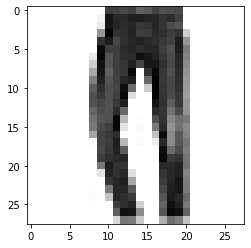

In [108]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [109]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print(test_labels)
test_labels = to_categorical(test_labels)
print(test_labels)


[9 2 1 ... 8 1 5]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Hacemos predicciones sobre la 6ª imagen de test en cada modelo

**MODELO 1**

In [110]:
import numpy as np
predictions1 = network1.predict(test_images)
print(np.argmax(predictions1[5]))
print(predictions1[5])
np.sum(predictions1[5])
print(predictions1)

1
[2.6952261e-03 9.8846078e-01 2.2277599e-03 2.8975401e-03 2.4218457e-03
 1.2636082e-06 1.2842419e-03 1.0870205e-08 1.1292995e-05 1.4395299e-08]
[[5.89667878e-04 1.24010739e-06 1.83102710e-03 ... 2.06146896e-01
  7.59009831e-03 6.45625532e-01]
 [2.37696571e-03 5.10742029e-05 8.42802405e-01 ... 1.00220450e-05
  8.59143620e-04 5.89429517e-04]
 [3.32289725e-04 9.99249756e-01 1.56657319e-04 ... 1.02982615e-10
  1.26148564e-06 1.07080692e-10]
 ...
 [4.73524630e-02 5.21672366e-04 5.19639580e-03 ... 7.81439885e-04
  6.39690816e-01 6.12896692e-04]
 [1.02542937e-02 9.38933253e-01 3.75181250e-03 ... 3.61370411e-07
  1.92763720e-04 9.65717163e-07]
 [2.77647236e-03 4.39260679e-04 1.06054023e-02 ... 3.41569126e-01
  8.88196677e-02 4.99518700e-02]]


**MODELO 2**

In [111]:
predictions2 = network2.predict(test_images)
print(np.argmax(predictions2[5]))
print(predictions2[5])
np.sum(predictions2[5])
print(predictions2)

1
[4.8582042e-03 9.8687565e-01 1.0049086e-03 8.2266185e-04 6.3634161e-03
 6.9814300e-11 6.6919485e-05 1.4077305e-08 8.1266053e-06 1.6111652e-07]
[[6.14840174e-05 2.02030378e-06 1.13195983e-05 ... 1.52043581e-01
  5.83112147e-03 5.52122951e-01]
 [4.64191689e-04 2.14342919e-07 9.46760535e-01 ... 4.73192069e-13
  1.10826250e-05 3.14647731e-15]
 [4.51538981e-05 9.99731123e-01 4.52942368e-05 ... 4.27134328e-09
  1.00212685e-06 1.60767939e-07]
 ...
 [4.44856845e-02 3.60128729e-06 3.85116320e-03 ... 2.61898185e-05
  7.79358447e-01 4.37966605e-07]
 [2.16533699e-05 9.98651683e-01 2.29878315e-05 ... 1.47728926e-07
  2.06838195e-06 1.06568405e-04]
 [9.67443339e-05 1.02774866e-05 2.62063520e-04 ... 3.06153763e-02
  8.70222040e-03 2.80784559e-03]]


**MODELO 3**

In [112]:
predictions3 = network3.predict(test_images)
print(np.argmax(predictions3[5]))
print(predictions3[5])
np.sum(predictions3[5])
print(predictions3)

1
[0.11761247 0.4191501  0.06489743 0.1836827  0.04079355 0.02841133
 0.07259049 0.02957506 0.01665206 0.02663482]
[[0.02080029 0.00934897 0.01913299 ... 0.20286226 0.07892019 0.32719147]
 [0.08039855 0.03210274 0.24599628 ... 0.01696243 0.13115966 0.03724791]
 [0.06002277 0.56946677 0.04434499 ... 0.03112728 0.00960527 0.02573171]
 ...
 [0.19618937 0.02863297 0.05075193 ... 0.03292486 0.20743734 0.06404899]
 [0.06565057 0.48560983 0.04291701 ... 0.04161207 0.013287   0.03317415]
 [0.03231187 0.02021217 0.04472087 ... 0.278746   0.09529245 0.18022375]]


**MODELO 4**

In [113]:
predictions4 = network4.predict(test_images)
print(np.argmax(predictions3[5]))
print(predictions4[5])
np.sum(predictions4[5])
print(predictions4)

1
[8.4433528e-03 9.7211784e-01 3.4468134e-03 1.0138204e-02 2.6496453e-03
 4.2195915e-04 2.1108061e-03 3.3713508e-04 1.1028892e-05 3.2317758e-04]
[[8.95742036e-04 2.80358200e-03 1.41091587e-03 ... 3.20945174e-01
  6.84172055e-03 5.03397942e-01]
 [5.44015178e-03 2.46889400e-03 7.94823766e-01 ... 9.53165116e-04
  1.58138864e-03 1.06403495e-04]
 [2.88114604e-03 9.84407425e-01 2.84721004e-03 ... 3.70966212e-04
  2.12391797e-06 1.26776577e-04]
 ...
 [5.64341620e-03 3.04671503e-05 1.54110871e-03 ... 3.40483896e-03
  9.52412367e-01 5.55677863e-04]
 [2.64237449e-03 9.78646576e-01 3.35808122e-03 ... 5.10584796e-04
  2.76555966e-06 1.66461308e-04]
 [3.16856924e-04 6.62525359e-04 1.01972464e-03 ... 1.34280145e-01
  4.44293953e-03 1.17659513e-02]]


**MODELO 5**

In [114]:
predictions5 = network5.predict(test_images)
print(np.argmax(predictions5[5]))
print(predictions5[5])
np.sum(predictions5[5])
print(predictions5)

1
[3.2675995e-03 9.7986025e-01 7.9180580e-04 2.4941724e-03 1.2849758e-02
 3.1457569e-06 6.9359812e-04 7.1259860e-06 2.8102151e-05 4.3322480e-06]
[[3.3259974e-05 2.4949226e-05 1.6643472e-04 ... 2.5835913e-01
  1.5529488e-02 5.8159256e-01]
 [1.0289779e-03 2.1748756e-05 8.4584820e-01 ... 2.2093923e-07
  5.4868462e-04 2.7308633e-06]
 [6.1520113e-05 9.9959534e-01 2.3869698e-05 ... 2.7481792e-07
  4.5774053e-07 1.4319639e-07]
 ...
 [6.4913243e-02 2.2771362e-04 4.9908566e-03 ... 5.5656378e-04
  7.6192510e-01 1.0217921e-03]
 [4.0646698e-04 9.8236024e-01 3.1097746e-04 ... 4.3629901e-05
  1.5439498e-05 5.9993799e-05]
 [1.2508156e-03 2.3939752e-03 5.5448706e-03 ... 4.5866150e-01
  6.0984652e-02 5.9264511e-02]]


**MODELO 6**

In [115]:
predictions6 = network6.predict(test_images)
print(np.argmax(predictions6[5]))
print(predictions6[5])
np.sum(predictions6[5])
print(predictions6)

1
[7.8638932e-06 9.9998701e-01 7.5785911e-09 2.3952387e-06 2.5631957e-06
 2.3088893e-13 1.2897232e-07 3.7481530e-14 1.0241944e-09 1.0785820e-16]
[[7.5363027e-07 2.0621171e-09 6.6786980e-09 ... 1.2623209e-03
  4.6574196e-06 9.9441755e-01]
 [4.6173369e-05 1.6093800e-10 9.8619276e-01 ... 4.3198526e-12
  6.4111850e-07 1.8947149e-10]
 [5.1522138e-09 1.0000000e+00 7.5233401e-13 ... 4.2611483e-16
  7.2640803e-13 1.4743641e-20]
 ...
 [1.9120467e-05 1.6506206e-12 3.1480984e-06 ... 3.7500084e-07
  9.9995577e-01 1.2421828e-09]
 [1.6333166e-08 9.9997032e-01 6.8992770e-11 ... 1.7043115e-09
  2.6854756e-09 3.6632815e-12]
 [9.8611403e-05 3.2274019e-07 8.3486331e-05 ... 1.0375616e-02
  1.2893971e-02 6.0938904e-04]]


**MODELO 7**

In [116]:
predictions7 = network7.predict(test_images)
print(np.argmax(predictions7[5]))
print(predictions7[5])
np.sum(predictions7[5])
print(predictions7)

1
[4.3169107e-02 8.1635171e-01 1.0557396e-02 6.2336881e-02 3.9410792e-02
 6.3327583e-04 2.6033187e-02 3.1978425e-04 9.8811532e-04 1.9971636e-04]
[[7.5310800e-04 4.9966958e-04 3.4761049e-03 ... 2.1653901e-01
  5.9193995e-02 3.3675110e-01]
 [4.7510196e-03 1.9672391e-04 6.8680322e-01 ... 5.4396340e-05
  8.8371271e-03 8.4123929e-04]
 [4.0201801e-03 9.6707445e-01 1.0848484e-03 ... 7.0048853e-05
  9.9239849e-05 2.9107121e-05]
 ...
 [2.0749895e-01 1.0270627e-02 1.2640646e-02 ... 6.1601801e-03
  2.4018317e-01 8.7450482e-03]
 [1.0153230e-02 7.4395174e-01 3.2023846e-03 ... 8.6074858e-04
  4.8149278e-04 4.2114986e-04]
 [4.4659139e-03 3.9384216e-03 1.4399785e-02 ... 3.0311111e-01
  6.7742348e-02 6.1596617e-02]]


**MODELO 8**

In [117]:
predictions8 = network8.predict(test_images)
print(np.argmax(predictions8[5]))
print(predictions8[5])
np.sum(predictions8[5])
print(predictions8)

1
[1.5492789e-03 9.9789149e-01 6.8699868e-05 2.9382264e-04 9.6623437e-05
 2.8146707e-09 9.8133620e-05 6.6499001e-07 1.3481127e-06 4.7367230e-09]
[[2.81399866e-06 2.82039139e-07 1.80775612e-06 ... 3.16086784e-02
  9.60126461e-04 9.32385802e-01]
 [7.08946085e-04 1.67552128e-06 9.21614707e-01 ... 3.25750094e-08
  4.91746287e-05 6.94674327e-08]
 [2.82260335e-05 9.99927163e-01 2.24661744e-06 ... 2.38767541e-07
  1.35849746e-07 4.11134404e-10]
 ...
 [4.48429072e-03 1.05403636e-07 3.63466650e-04 ... 1.29359396e-04
  9.58794177e-01 2.83586871e-07]
 [9.27248095e-07 9.99671936e-01 4.01994384e-07 ... 9.20897662e-07
  6.76533318e-08 1.81866511e-07]
 [9.01095518e-06 1.50766652e-06 7.65911391e-05 ... 1.11732641e-02
  3.95879056e-03 1.37692463e-04]]


Se puede comprobar que todos los modelos predicen de manera correcta que la imagen 6 es el elemento 1 de nuestro vector (pantalones), pero si nos fijamos en el vector de probabilidades, obeservamos que en todos excepto el 3 y el 7, la probabilidad de que sea 1 es bastante más grande que el resto

Ahora vamos a graficar las predicciones de la imagen 6 en cada modelo

In [118]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [119]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


predictions1 = network1.predict(test_images)
predictions2 = network2.predict(test_images)
predictions3 = network3.predict(test_images)
predictions4 = network4.predict(test_images)
predictions5 = network5.predict(test_images)
predictions6 = network6.predict(test_images)
predictions7 = network7.predict(test_images)
predictions8 = network8.predict(test_images)


Predicciones

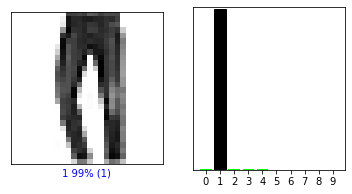

In [120]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions1[i],  test_labels)
plt.show()

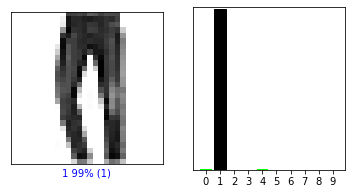

In [121]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions2[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions2[i],  test_labels)
plt.show()


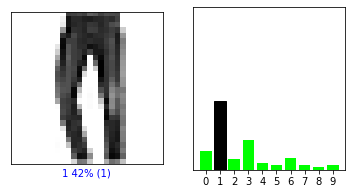

In [122]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions3[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions3[i],  test_labels)
plt.show()

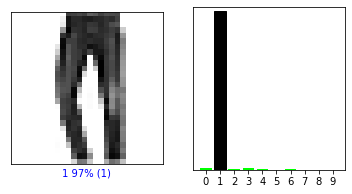

In [123]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions4[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions4[i],  test_labels)
plt.show()

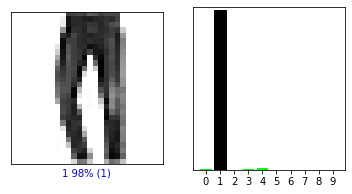

In [124]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions5[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions5[i],  test_labels)
plt.show()

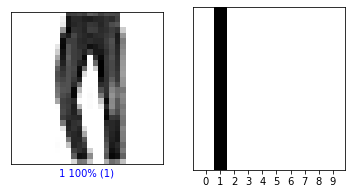

In [125]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions6[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions6[i],  test_labels)
plt.show()

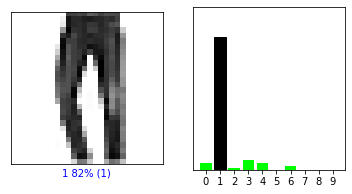

In [126]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions7[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions7[i],  test_labels)
plt.show()

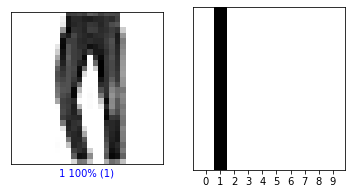

In [127]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions8[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions8[i],  test_labels)
plt.show()

Como hemos explicado antes, en estos gráficos observamos de nuevo que el modelo 3 predice de manera correcta que prenda es, pero con un porcentaje relativamente bajo.

### APARTADO 3

Analizar e interpretar los resultados del caso 2 y el 7 frente a sus originales si se multiplica por 5 las épocas de entrenamiento (25)

MODELO 2

In [128]:
network22 = models.Sequential()
network22.add(layers.Dense(10, activation='relu', input_shape=(28*28,), name = 'capa1'))
network22.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network22.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [129]:
network22.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [130]:
network22.add(layers.Flatten(input_shape=(28,28)))

In [131]:
network22.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 1s 2ms/step - loss: 0.8157 - accuracy: 0.7342
Epoch 2/25
469/469 [==============================] - 1s 2ms/step - loss: 0.5073 - accuracy: 0.8259
Epoch 3/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4665 - accuracy: 0.8393
Epoch 4/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4446 - accuracy: 0.8459
Epoch 5/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4315 - accuracy: 0.8500
Epoch 6/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4220 - accuracy: 0.8537
Epoch 7/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4142 - accuracy: 0.8564
Epoch 8/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4089 - accuracy: 0.8564
Epoch 9/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4028 - accuracy: 0.8597
Epoch 10/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3984 - accuracy: 0.8610

Aunque esperabamos un sobreentrenamiento del modelo, vemos que lo que ocurre es que a partir de la vuelta 13/14, el valor de pérdida y de precisión apenas varían.

MODELO 7

In [132]:
network77 = models.Sequential()
network77.add(layers.Dense(512, activation='relu', input_shape=(28*28,), name = 'capa1'))
network77.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network77.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 512)               401920    
_________________________________________________________________
capa2 (Dense)                (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [133]:
network77.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [134]:
network77.add(layers.Flatten(input_shape=(28,28)))

In [135]:
network77.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 3s 7ms/step - loss: 1.0141 - accuracy: 0.6905
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 0.6558 - accuracy: 0.7897
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.5786 - accuracy: 0.8129
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 0.5375 - accuracy: 0.8229
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.5111 - accuracy: 0.8300
Epoch 6/25
469/469 [==============================] - 3s 6ms/step - loss: 0.4922 - accuracy: 0.8359
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 0.4774 - accuracy: 0.8395
Epoch 8/25
469/469 [==============================] - 3s 6ms/step - loss: 0.4657 - accuracy: 0.8410
Epoch 9/25
469/469 [==============================] - 3s 6ms/step - loss: 0.4555 - accuracy: 0.8449
Epoch 10/25
469/469 [==============================] - 3s 6ms/step - loss: 0.4472 - accuracy: 0.8478

Del mismo modo, podemos observar que cuantas más iteraciones, más precisión tiene, aunque va aumentando cada vez más lentamente. En cuanto a la pérdida, a más iteraciones, menos pérdida, al igual que con la precisión, cada vez la pérdida aunque se reduce, se reduce menos.

### APARTADO 6b



Vemos la predicción, igual que el gráfico anterior, de las 10 primeras imágenes del conjunto de test, para cada uno de los 8 casos.

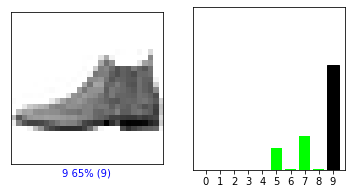

<Figure size 432x288 with 0 Axes>

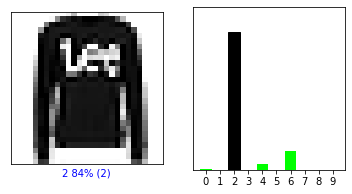

<Figure size 432x288 with 0 Axes>

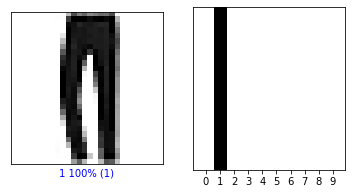

<Figure size 432x288 with 0 Axes>

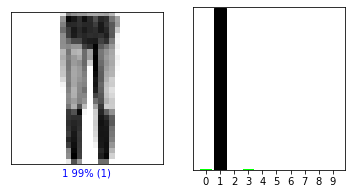

<Figure size 432x288 with 0 Axes>

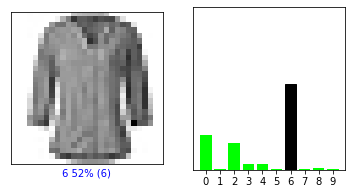

<Figure size 432x288 with 0 Axes>

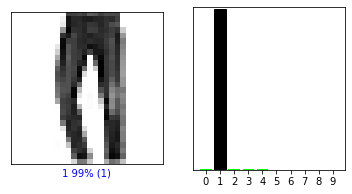

<Figure size 432x288 with 0 Axes>

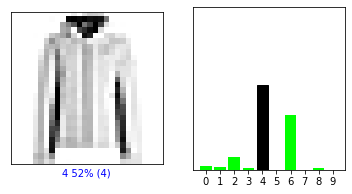

<Figure size 432x288 with 0 Axes>

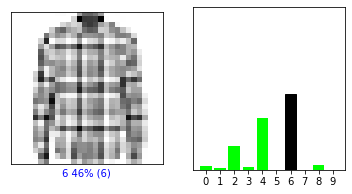

<Figure size 432x288 with 0 Axes>

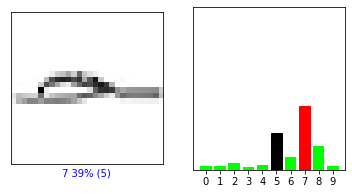

<Figure size 432x288 with 0 Axes>

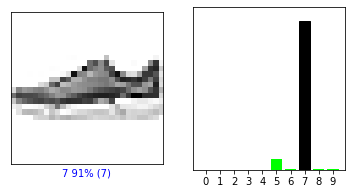

<Figure size 432x288 with 0 Axes>

In [136]:
for i in range(10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions1[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions1[i],  test_labels)
    plt.show()
    plt.clf()
    

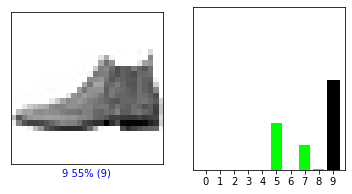

<Figure size 432x288 with 0 Axes>

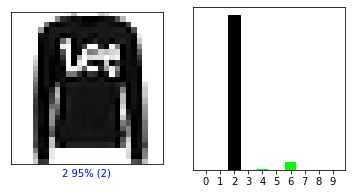

<Figure size 432x288 with 0 Axes>

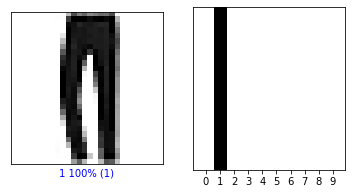

<Figure size 432x288 with 0 Axes>

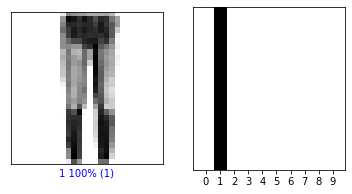

<Figure size 432x288 with 0 Axes>

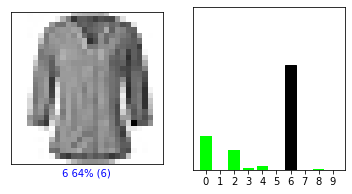

<Figure size 432x288 with 0 Axes>

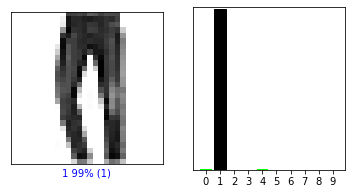

<Figure size 432x288 with 0 Axes>

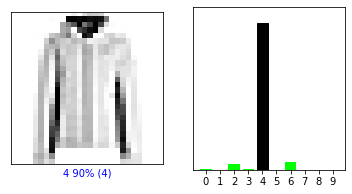

<Figure size 432x288 with 0 Axes>

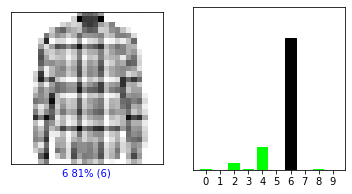

<Figure size 432x288 with 0 Axes>

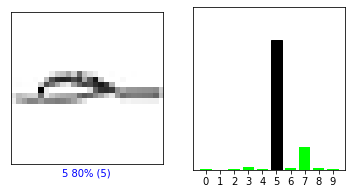

<Figure size 432x288 with 0 Axes>

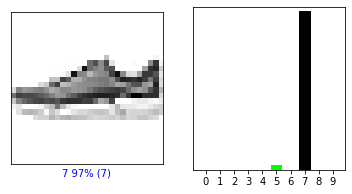

<Figure size 432x288 with 0 Axes>

In [137]:
for i in range(10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions2[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions2[i],  test_labels)
    plt.show()
    plt.clf()

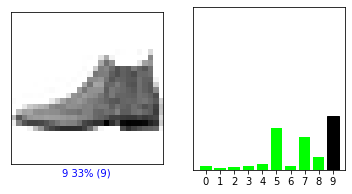

<Figure size 432x288 with 0 Axes>

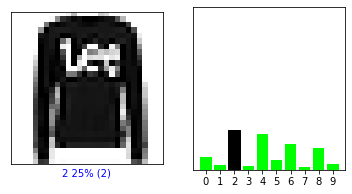

<Figure size 432x288 with 0 Axes>

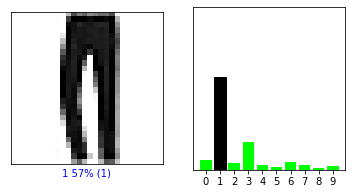

<Figure size 432x288 with 0 Axes>

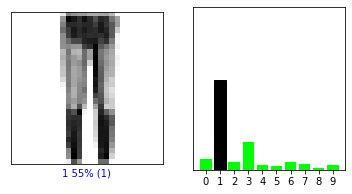

<Figure size 432x288 with 0 Axes>

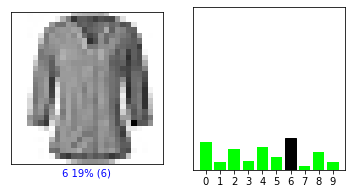

<Figure size 432x288 with 0 Axes>

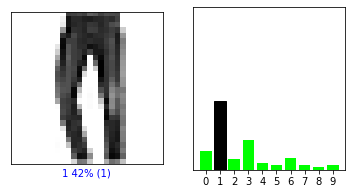

<Figure size 432x288 with 0 Axes>

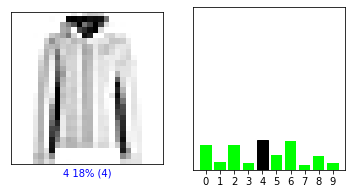

<Figure size 432x288 with 0 Axes>

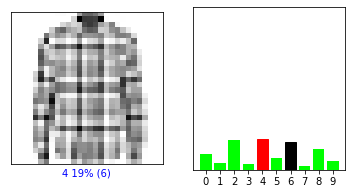

<Figure size 432x288 with 0 Axes>

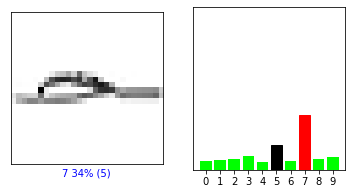

<Figure size 432x288 with 0 Axes>

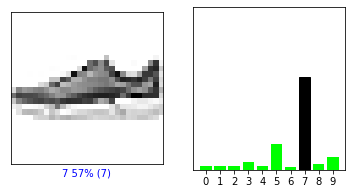

<Figure size 432x288 with 0 Axes>

In [139]:
for i in range(10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions3[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions3[i],  test_labels)
    plt.show()
    plt.clf()


En el caso del modelo 3, podemos ver que en varias predicciones llega a confundir algunas prendas con otras. El caso más destacable es el penúltimo, en el que confunde una sandalia con una zapatilla.

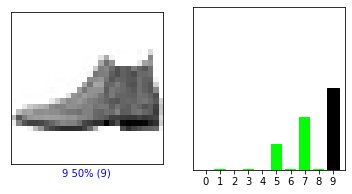

<Figure size 432x288 with 0 Axes>

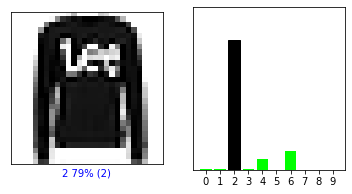

<Figure size 432x288 with 0 Axes>

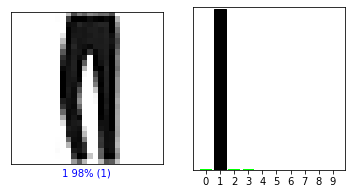

<Figure size 432x288 with 0 Axes>

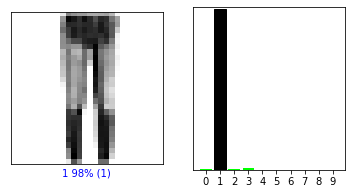

<Figure size 432x288 with 0 Axes>

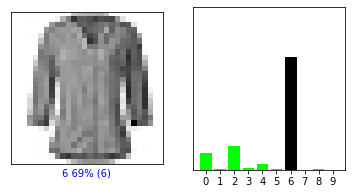

<Figure size 432x288 with 0 Axes>

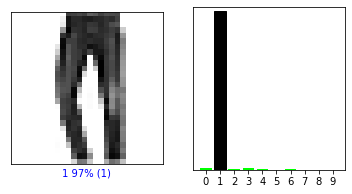

<Figure size 432x288 with 0 Axes>

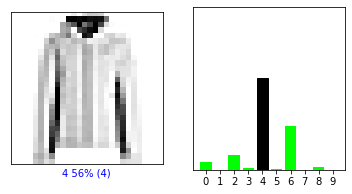

<Figure size 432x288 with 0 Axes>

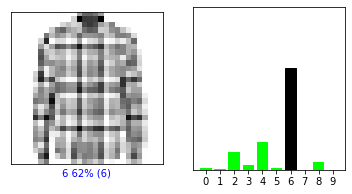

<Figure size 432x288 with 0 Axes>

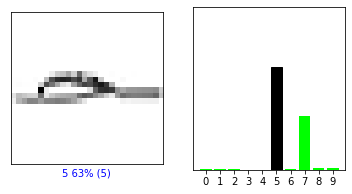

<Figure size 432x288 with 0 Axes>

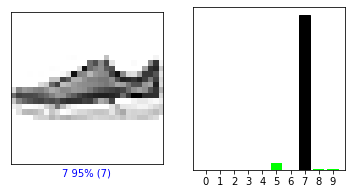

<Figure size 432x288 with 0 Axes>

In [141]:
for i in range(10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions4[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions4[i],  test_labels)
    plt.show()
    plt.clf()

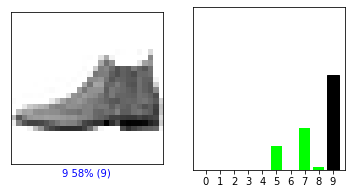

<Figure size 432x288 with 0 Axes>

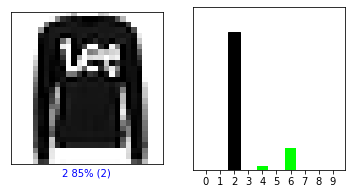

<Figure size 432x288 with 0 Axes>

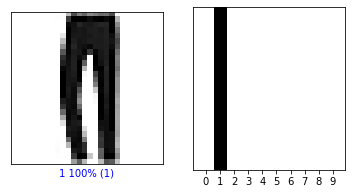

<Figure size 432x288 with 0 Axes>

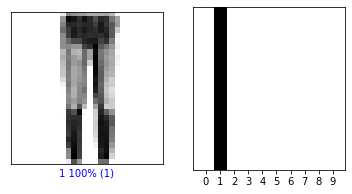

<Figure size 432x288 with 0 Axes>

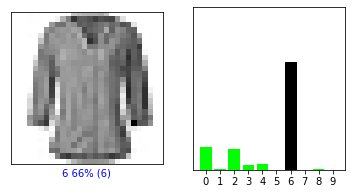

<Figure size 432x288 with 0 Axes>

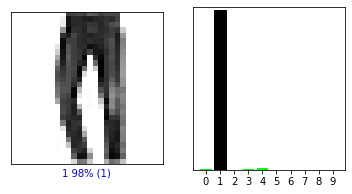

<Figure size 432x288 with 0 Axes>

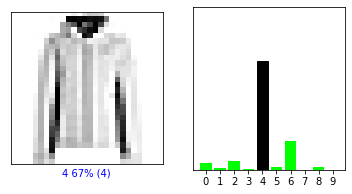

<Figure size 432x288 with 0 Axes>

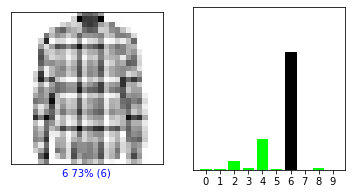

<Figure size 432x288 with 0 Axes>

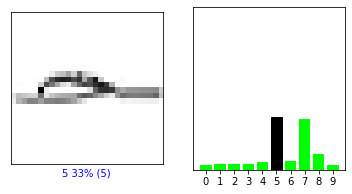

<Figure size 432x288 with 0 Axes>

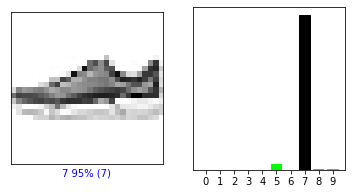

<Figure size 432x288 with 0 Axes>

In [142]:
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions5[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions5[i],  test_labels)
  plt.show()
  plt.clf()

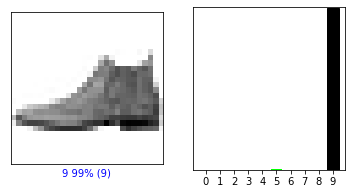

<Figure size 432x288 with 0 Axes>

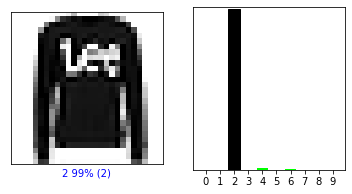

<Figure size 432x288 with 0 Axes>

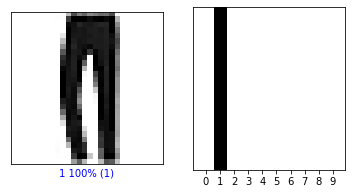

<Figure size 432x288 with 0 Axes>

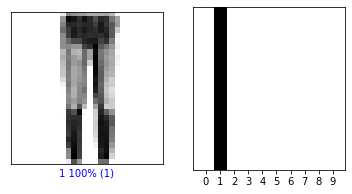

<Figure size 432x288 with 0 Axes>

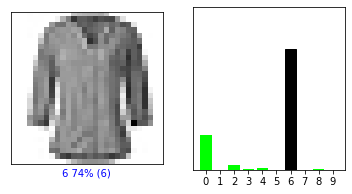

<Figure size 432x288 with 0 Axes>

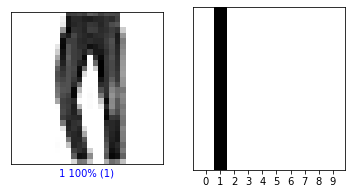

<Figure size 432x288 with 0 Axes>

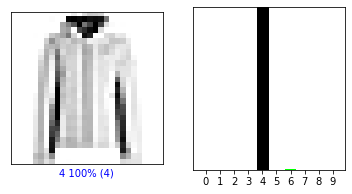

<Figure size 432x288 with 0 Axes>

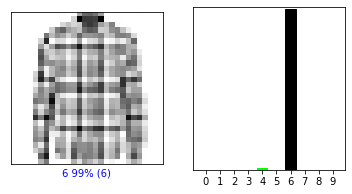

<Figure size 432x288 with 0 Axes>

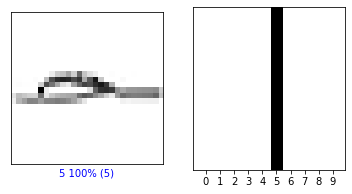

<Figure size 432x288 with 0 Axes>

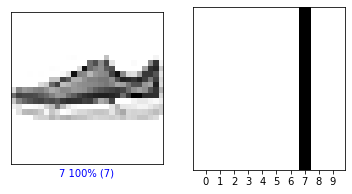

<Figure size 432x288 with 0 Axes>

In [143]:
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions6[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions6[i],  test_labels)
  plt.show()
  plt.clf()

Observamos que el modelo de la red neuronal 6 hace muy buenas predicciones, si nos fijamos su precisión al entrenarla era de 0.8923 y su pérdida de 0.2930. Vemos que en lo que más se confunde es entre camisetas y camisas, lo cual es lógico ya que tienen mucho parecido; en lo demás lo predice casi al 100% correctamente.

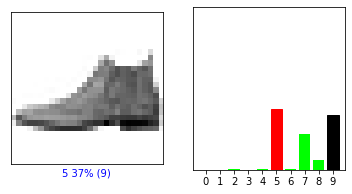

<Figure size 432x288 with 0 Axes>

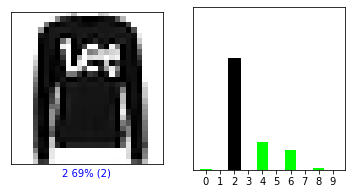

<Figure size 432x288 with 0 Axes>

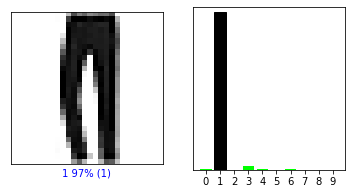

<Figure size 432x288 with 0 Axes>

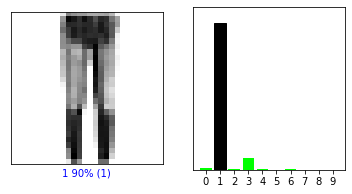

<Figure size 432x288 with 0 Axes>

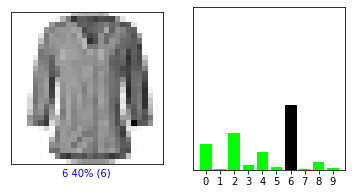

<Figure size 432x288 with 0 Axes>

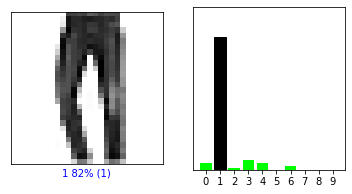

<Figure size 432x288 with 0 Axes>

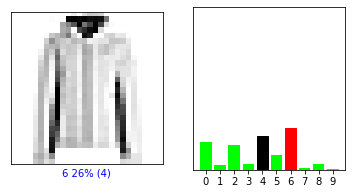

<Figure size 432x288 with 0 Axes>

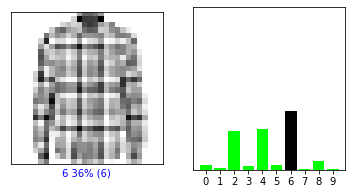

<Figure size 432x288 with 0 Axes>

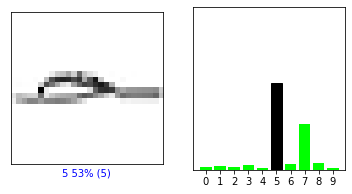

<Figure size 432x288 with 0 Axes>

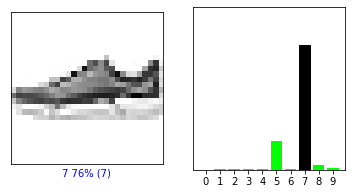

<Figure size 432x288 with 0 Axes>

In [144]:
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions7[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions7[i],  test_labels)
  plt.show()
  plt.clf()

Como podemos ver, esta red tenia: loss: 0.7624 y accuracy: 0.7517, a esto se debe que confunde varias imagenes como puede ser las camisetas con chaquetas, camisas o jerseys. 

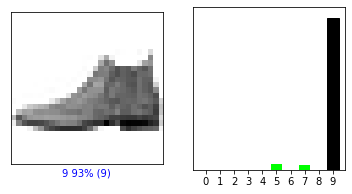

<Figure size 432x288 with 0 Axes>

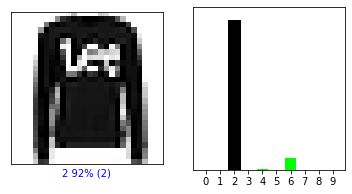

<Figure size 432x288 with 0 Axes>

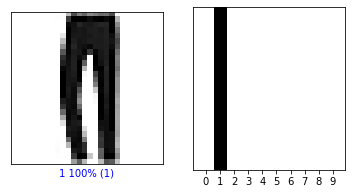

<Figure size 432x288 with 0 Axes>

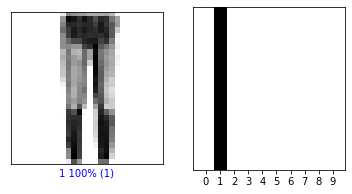

<Figure size 432x288 with 0 Axes>

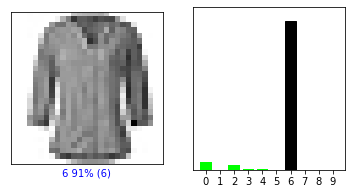

<Figure size 432x288 with 0 Axes>

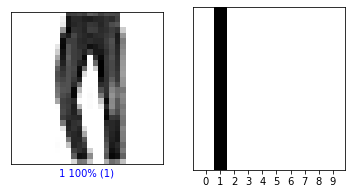

<Figure size 432x288 with 0 Axes>

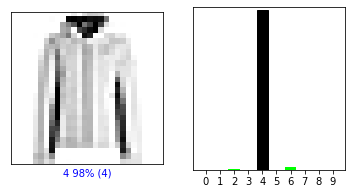

<Figure size 432x288 with 0 Axes>

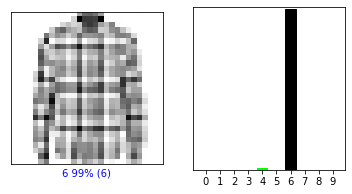

<Figure size 432x288 with 0 Axes>

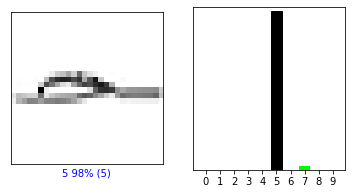

<Figure size 432x288 with 0 Axes>

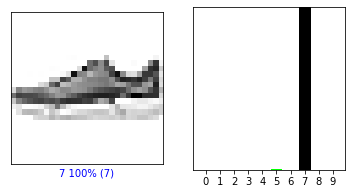

<Figure size 432x288 with 0 Axes>

In [145]:
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions8[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions8[i],  test_labels)
  plt.show()
  plt.clf()

### APARTADO 7

Mejore el modelo usando el de la configuración del caso 3, pero cambiando el optimizador por ‘adam’y la función de pérdida ‘sparse_categorical_crossentropy’.

In [ ]:
##función de activación: sigmoid
##optimizador: sgd
network31 = models.Sequential()
network31.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,), name = 'capa1'))
network31.add(layers.Dense(10, activation='softmax', name = 'capa2'))

In [ ]:
network31.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network31.add(layers.Flatten(input_shape=(28,28)))

In [ ]:
network31.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.4518 - accuracy: 0.6171
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8735 - accuracy: 0.7517
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6976 - accuracy: 0.7875
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6075 - accuracy: 0.8118
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5506 - accuracy: 0.8260


Cambiando el optimizador, podemos comprobar que el modelo mejora con diferencia

**Adam** (Adaptive moment estimation)
El algoritmo Adam combina los algoritmos de optimización de AdaGrad y RMSProp. Se mantiene un factor de entrenamiento por parámetro y además de calcular RMSProp, cada factor de entrenamiento también se ve afectado por la media del momentum del gradiente.

El algoritmo de Adam es diferente del sgd. El sgd mantiene una tasa de aprendizaje única (alfa) para actualizar todos los pesos, y la tasa de aprendizaje no cambia durante el proceso de entrenamiento, Mientras que Adam calcula una tasa de aprendizaje diferente para cada peso.

El algoritmo de Adam obtiene las ventajas de los algoritmos AdaGrad y RMSProp. Adam no solo calcula la tasa de aprendizaje de parámetros adaptativos en función del valor medio del primer momento como el algoritmo RMSProp, sino que también hace un uso completo del valor medio del segundo momento del gradiente (es decir, la varianza no centrada). 

Específicamente, el algoritmo calcula el promedio móvil exponencial del gradiente, y los hiperparámetros beta1 y beta2 controlan la tasa de disminución de estos promedios móviles. El valor inicial de la media móvil y los valores de beta1 y beta2 están cerca de 1 (valor recomendado), por lo que la desviación de la estimación de momento está cerca de 0. La desviación se mejora calculando primero la estimación con desviación y luego calculando la estimación después de la corrección de desviación

### **MATRIZ DE CONFUSIÓN**

In [ ]:
#import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels)

Matriz M1

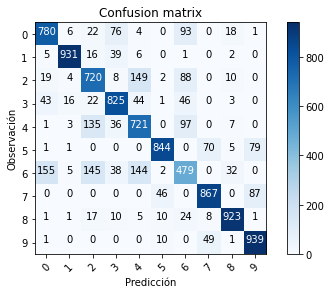

In [ ]:
# Predict the values from the validation dataset
Y_pred1 = network1.predict(test_images)
Y_pred_classes1 = np.argmax(Y_pred1, axis = 1) 
Y_true1 = np.argmax(test_labels, axis = 1) 
confusion_mtx1 = confusion_matrix(Y_true1, Y_pred_classes1) 
plot_confusion_matrix(confusion_mtx1, classes = range(10))

Matriz M2

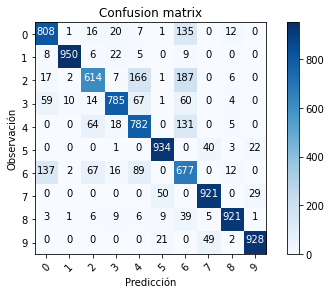

In [ ]:
# Predict the values from the validation dataset
Y_pred2 = network2.predict(test_images)
Y_pred_classes2 = np.argmax(Y_pred2, axis = 1) 
Y_true2 = np.argmax(test_labels, axis = 1) 
confusion_mtx2 = confusion_matrix(Y_true2, Y_pred_classes2) 
plot_confusion_matrix(confusion_mtx2, classes = range(10))

Matriz M3

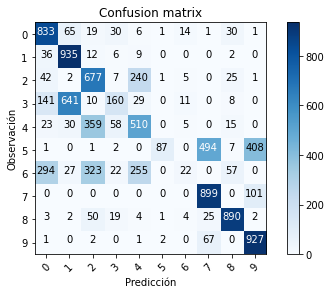

In [ ]:
Y_pred3 = network3.predict(test_images)
Y_pred_classes3 = np.argmax(Y_pred3, axis = 1) 
Y_true3 = np.argmax(test_labels, axis = 1) 
confusion_mtx3 = confusion_matrix(Y_true3, Y_pred_classes3) 
plot_confusion_matrix(confusion_mtx3, classes = range(10))

Matriz M4

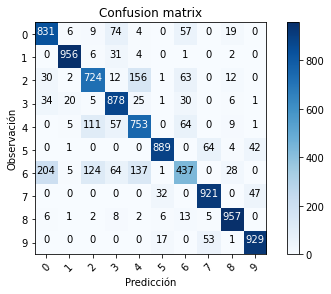

In [ ]:
Y_pred4 = network4.predict(test_images)
Y_pred_classes4 = np.argmax(Y_pred4, axis = 1) 
Y_true4 = np.argmax(test_labels, axis = 1) 
confusion_mtx4 = confusion_matrix(Y_true4, Y_pred_classes4) 
plot_confusion_matrix(confusion_mtx4, classes = range(10))